In [440]:
import pandas as pd
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

<Axes: >

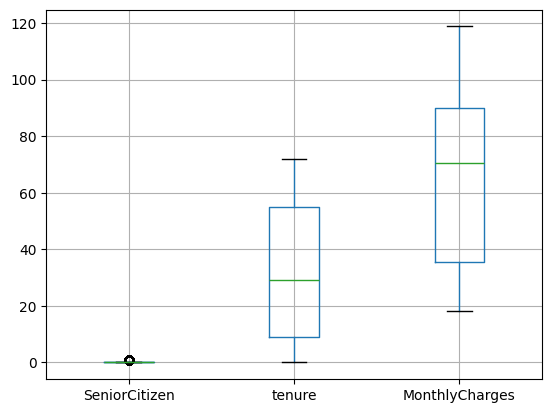

In [441]:
df.boxplot()

In [442]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [444]:
#gender Partner	Dependents PhoneService OnlineSecurity DeviceProtection	TechSupport	StreamingTV	StreamingMovies PaperlessBilling 	Churn

In [445]:
binary_columns = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']

In [446]:
def binary_encode(df, binary_columns):
    for col in binary_columns:
      df[col] = df[col].replace({'Yes': 1, 'No': 0,'Female':1,'Male':0 })
    return df
df_cleaned = binary_encode(df, binary_columns) # why this line????
print(df_cleaned)


      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       1              0        1           0       1   
1     5575-GNVDE       0              0        0           0      34   
2     3668-QPYBK       0              0        0           0       2   
3     7795-CFOCW       0              0        0           0      45   
4     9237-HQITU       1              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       0              0        1           1      24   
7039  2234-XADUH       1              0        1           1      72   
7040  4801-JZAZL       1              0        1           1      11   
7041  8361-LTMKD       0              1        1           0       4   
7042  3186-AJIEK       0              0        0           0      66   

      PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0                0  No phone service             DSL       

<ipython-input-446-0051cc9d0388>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0,'Female':1,'Male':0 })


In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [448]:
#gender1 Partner	Dependents PhoneService ,OnlineSecurity PaperlessBilling
# done binary

In [449]:
df.drop(columns=['customerID'],inplace=True)


In [450]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [451]:
df = df.fillna(0)

In [452]:
one_hot_encoding=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod','Contract' ]
df=pd.get_dummies(df,columns=one_hot_encoding)
df=df.astype(int)

In [453]:
binary_columns = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']

In [454]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,1,0,1,0,1,29,29,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,34,1,0,56,1889,0,...,1,0,0,0,0,0,1,0,1,0
2,0,0,0,0,2,1,1,53,108,1,...,1,0,0,0,0,0,1,1,0,0
3,0,0,0,0,45,0,0,42,1840,0,...,1,0,0,1,0,0,0,0,1,0
4,1,0,0,0,2,1,1,70,151,1,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84,1990,0,...,0,0,1,0,0,0,1,0,1,0
7039,1,0,1,1,72,1,1,103,7362,0,...,0,0,1,0,1,0,0,0,1,0
7040,1,0,1,1,11,0,1,29,346,0,...,1,0,0,0,0,1,0,1,0,0
7041,0,1,1,0,4,1,1,74,306,1,...,1,0,0,0,0,0,1,1,0,0


In [455]:
from sklearn.preprocessing import MinMaxScaler


In [456]:
scaler=MinMaxScaler()

In [457]:
model=scaler.fit_transform(df)

In [458]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [459]:

X=df.drop(columns='Churn')
Y=df['Churn']

In [460]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [461]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
M_scaler=MinMaxScaler()

In [462]:
x_train=M_scaler.fit_transform(x_train)
x_test=M_scaler.transform(x_test)

In [463]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [464]:
models=[LogisticRegression(),RandomForestClassifier(n_estimators=100,max_depth=None,random_state=0),DecisionTreeClassifier(max_depth=None,random_state=0),GaussianNB()]

In [465]:
def my_models():
  for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_pred,y_test)
    print(model)
    print(acc)
    print('_________________________________________')

In [466]:
my_models()

LogisticRegression()
0.7991483321504613
_________________________________________
RandomForestClassifier(random_state=0)
0.7707594038325053
_________________________________________
DecisionTreeClassifier(random_state=0)
0.7239176721078779
_________________________________________
GaussianNB()
0.687721788502484
_________________________________________
